In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
iris_data =pd.read_csv('iris.csv')

In [14]:
iris_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
iris_data['outputs'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
iris_data.isnull().values.any()

False

In [20]:
iris_data['outputs'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: outputs, dtype: int64

C:\Users\user\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='outputs', ylabel='count'>

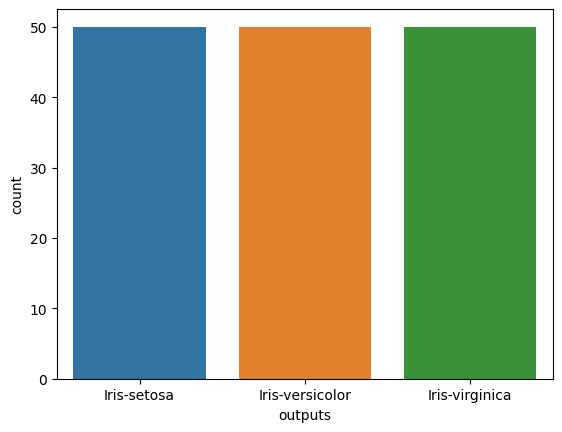

In [24]:
sns.countplot(iris_data['outputs'])

<AxesSubplot: xlabel='sepal length in cm', ylabel='sepal width in cm'>

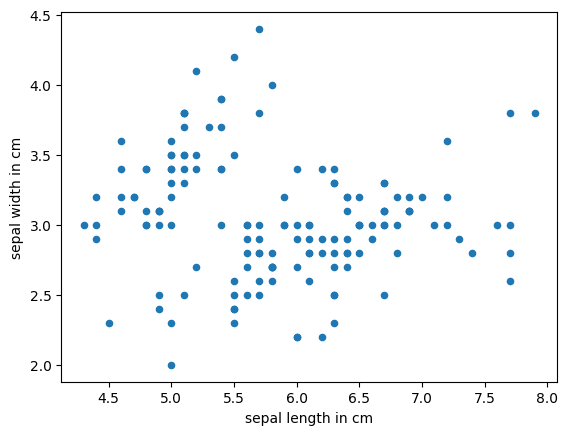

In [25]:
iris_data.plot(kind='scatter',x='sepal length in cm',y='sepal width in cm')

C:\Users\user\anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\user\anaconda\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\user\anaconda\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


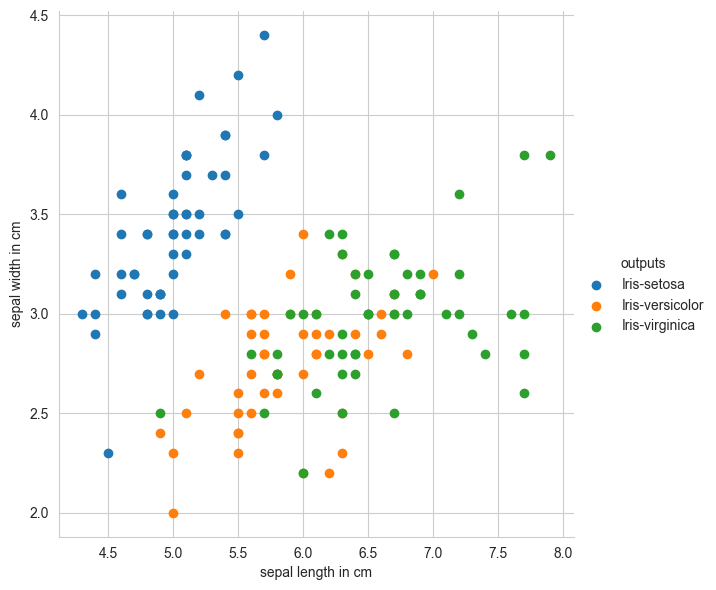

In [33]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='outputs',size=6).map(plt.scatter,'sepal length in cm','sepal width in cm').add_legend()

C:\Users\user\anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


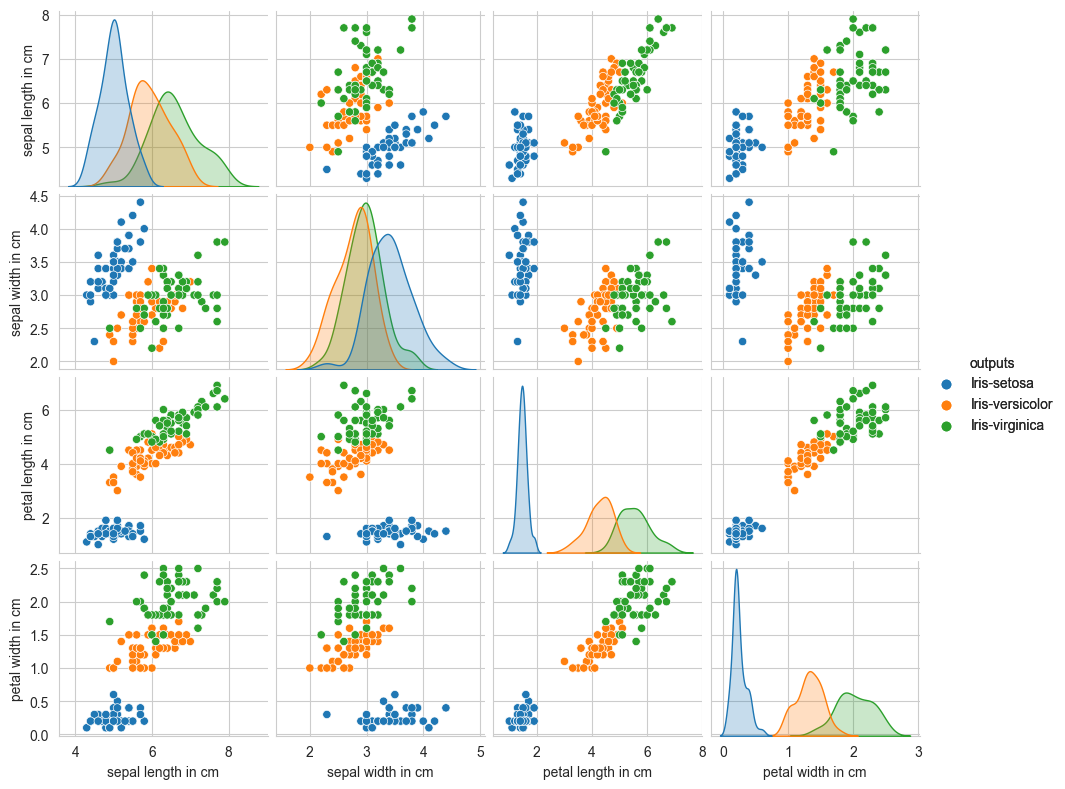

In [34]:
sns.pairplot(iris_data ,hue='outputs',size=2).add_legend()

In [37]:
for column in iris_data.columns:
    if iris_data[column].dtype == np.number:
        continue
iris_data[column] = LabelEncoder().fit_transform(iris_data[column])

C:\Users\user\AppData\Local\Temp\ipykernel_19996\2094383102.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if iris_data[column].dtype== np.number:


In [38]:
iris_data.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
outputs                 int64
dtype: object

In [39]:
iris_data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
x = iris_data.drop(['outputs'],axis = 1)
y = iris_data['outputs']

In [42]:
x

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: outputs, Length: 150, dtype: int64

In [62]:
x_train, x_test, y_train ,y_test = train_test_split(x,y, test_size = 0.2)

In [63]:
k_range = list(range(1,12))
acc = []
for i in k_range:
    
    knn= KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

In [64]:
acc

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [65]:
knn= KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [67]:
metrics.accuracy_score(y_test,y_pred)

1.0